In [8]:
#importar librerias 
import pandas as pd 
import matplotlib.pyplot as plt
import os 

In [4]:
def load_data():
    data_df = pd.read_csv("../files/input/shipping-data.csv")
    return data_df

df = load_data()

In [14]:
#Crear la ruta de guardado 
def save_data():
    if not os.path.exists("../docs"):
        os.makedirs("../docs")

save_data()

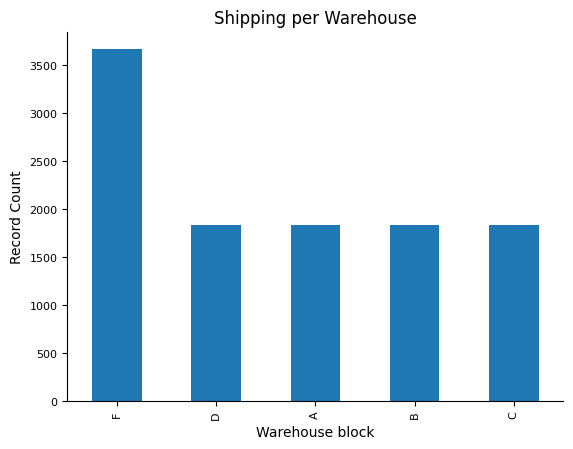

In [ ]:
#Visualización de la data
def create_visual_for_shipping_per_warehouse(df):
    df = df.copy()
    plt.figure()
    counts = df.Warehouse_block.value_counts()
    counts.plot.bar(
        title = "Shipping per Warehouse",
        xlabel = "Warehouse block",
        ylabel = "Record Count",
        color = "tab:blue", 
        fontsize = 8
    )

    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("../docs/shipping_per_warehouse.png")

create_visual_for_shipping_per_warehouse(df) 

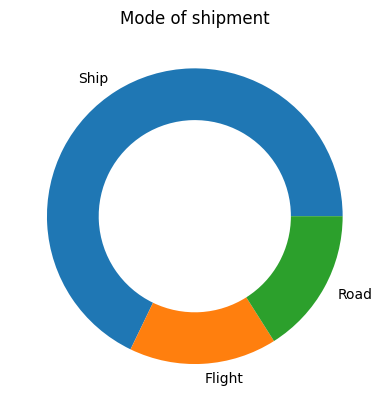

In [19]:
#Funcion visual for mode of Shipment

def create_visual_for_mode_of_shipment(df):
    df = df.copy()
    plt.figure()
    counts = df.Mode_of_Shipment.value_counts()
    counts.plot.pie(
        title = "Mode of shipment",
        wedgeprops = dict(width = 0.35),
        ylabel = "",
        colors = ["tab:blue", "tab:orange", "tab:green"]
    )

    plt.savefig("../docs/mode_of_shipment.png")

    
df = load_data()
create_visual_for_mode_of_shipment(df)

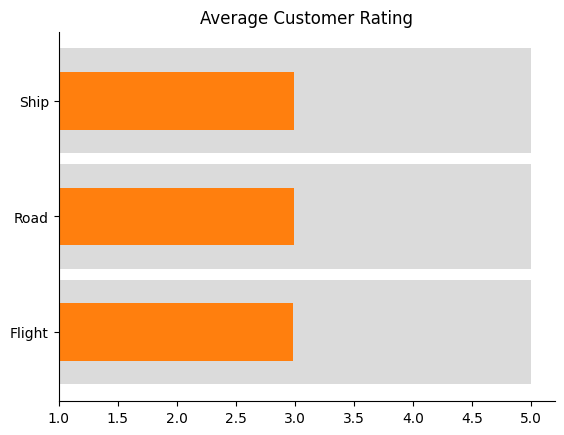

In [23]:
#Funcion visual for avarage Customer Rating

def create_visual_for_average_custer_rating(df):
    df = df.copy()
    plt.figure()
    df = (
        df[["Mode_of_Shipment","Customer_rating"]]
        .groupby("Mode_of_Shipment")
        .describe()
    )
    df.columns = df.columns.droplevel()
    df = df[["mean", "min", "max"]]
    plt.barh(
        y = df.index.values,
        width = df["max"].values -1,
        left = df["min"].values,
        height =0.9,
        color = "lightgray",
        alpha = 0.8,
    )

    colors = [
        "tab:green" if value >= 3.0 else "tab:orange" for value in df["mean"].values
    ]

    plt.barh(
        y = df.index.values,
        width = df["mean"].values -1,
        left = df["min"].values,
        color = colors,
        height =0.5,
        alpha = 1.0,
    )
    plt.title("Average Customer Rating")
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["left"].set_visible("gray")
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["bottom"].set_visible("gray")
    plt.savefig("../docs/average_customer_rating.png")

df = load_data()
create_visual_for_average_custer_rating(df)

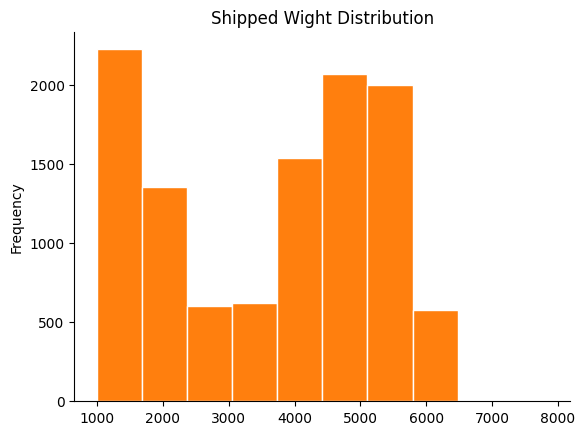

In [26]:
#Visualización for Weight Distribution 

def create_visual_for_weight_distribution(df):
    df = df.copy()
    plt.figure()
    df.Weight_in_gms.plot.hist(
        title = "Shipped Wight Distribution",
        color = "tab:orange",
        edgecolor = "white",
    )
    plt.gca().spines["top"].set_visible(False)
    plt.gca().spines["right"].set_visible(False)
    plt.savefig("../docs/weight_distribution.png")

df = load_data()
create_visual_for_weight_distribution(df)

In [34]:
%%writefile ../docs/index.html
<!DOCTYPE html>
<html>
    <body>
        <h1>Shipping Dashboard Example</h1>
        <div style="width:45%;float:left">
            <img src="../docs/shipping_per_warehouse.png" alt="Fig 1">
            <img src="../docs/mode_of_shipment.png" alt="Fig 2">
        </div>
        <div style="width:45%;float:left">
            <img src="../docs/average_customer_rating.png" alt="Fig 3">
            <img src="../docs/weight_distribution.png" alt="Fig 4">
        </div>
    </body>
</html>



Writing ../docs/index.html
